In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [20]:
df = pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
df.shape

(614, 13)

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


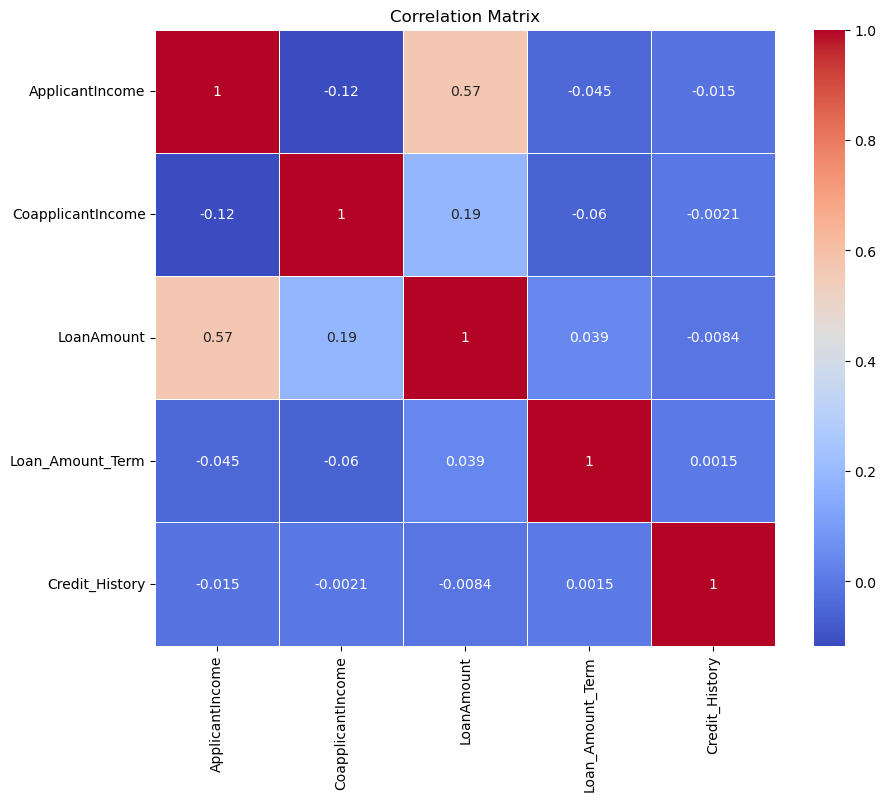

In [24]:
corr_matrix = df.corr() # Visualize the correlation matrix with annotations 
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix') 
plt.show()

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns


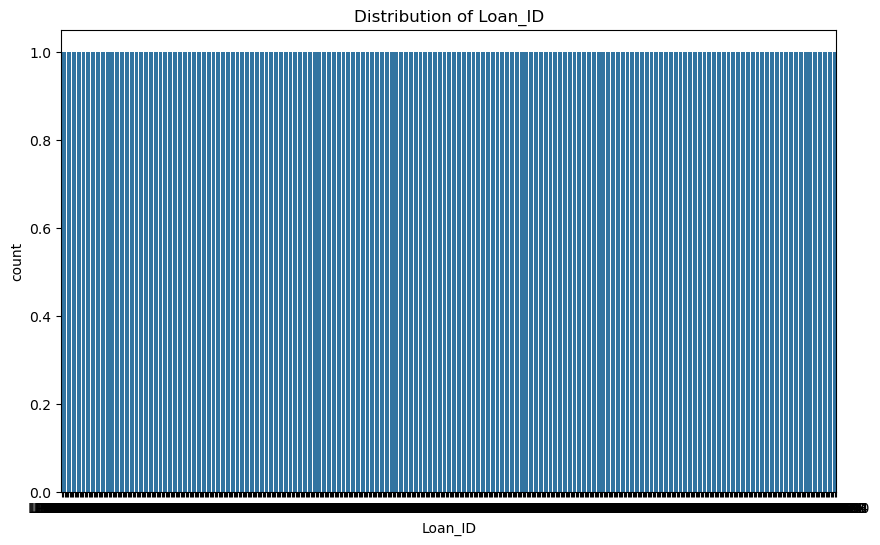

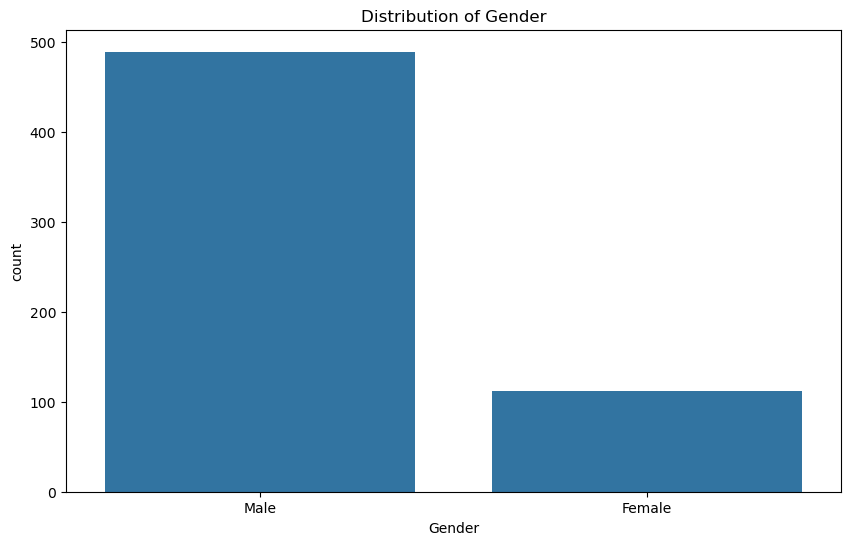

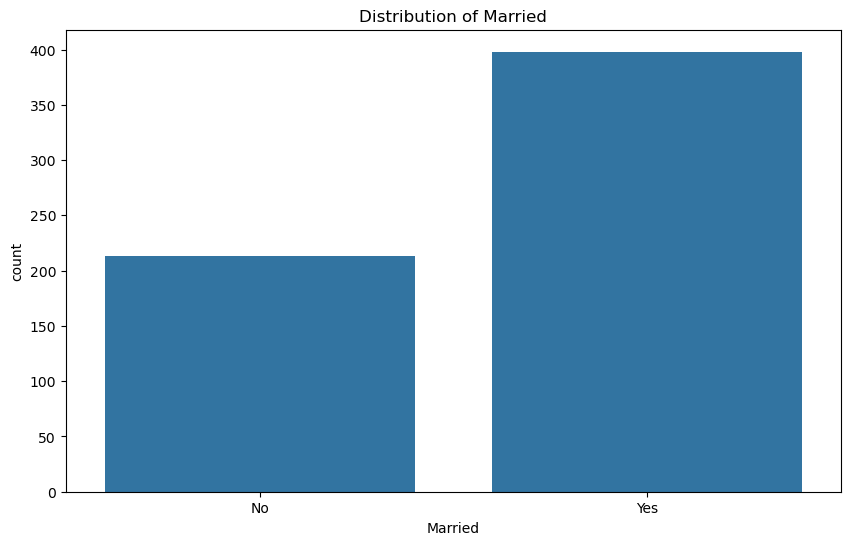

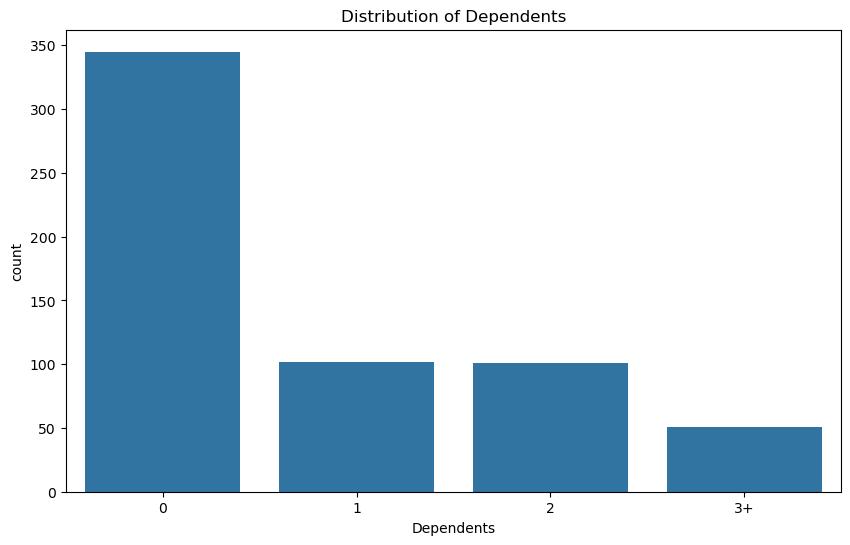

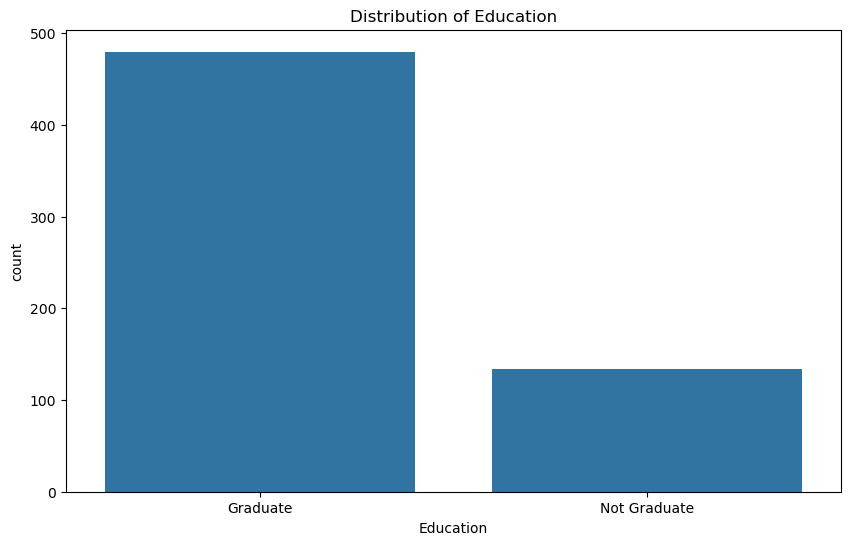

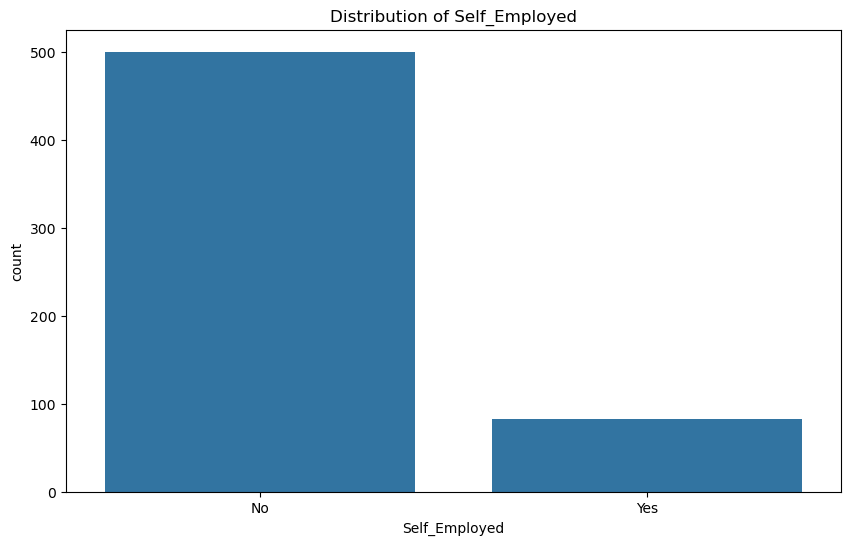

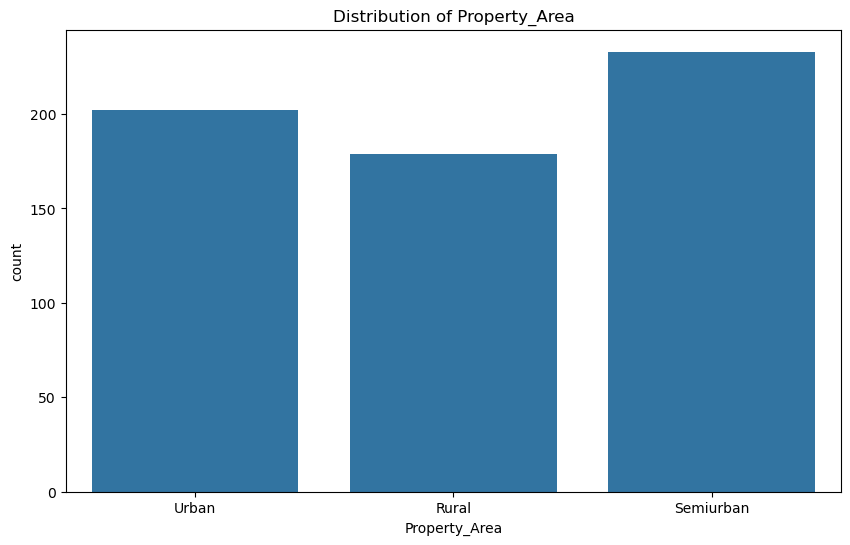

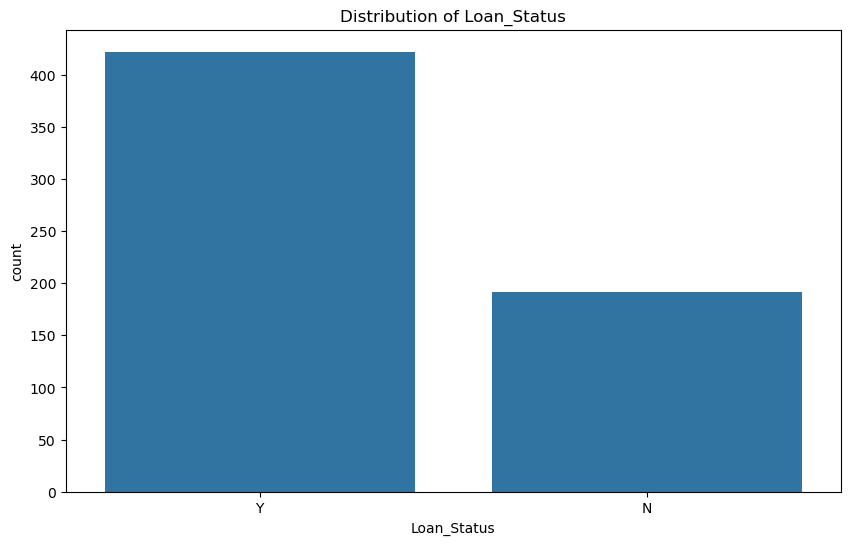

In [26]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()


In [27]:
# droping the rows  with nan  values
df.dropna(subset=['Married'],inplace = True ) 

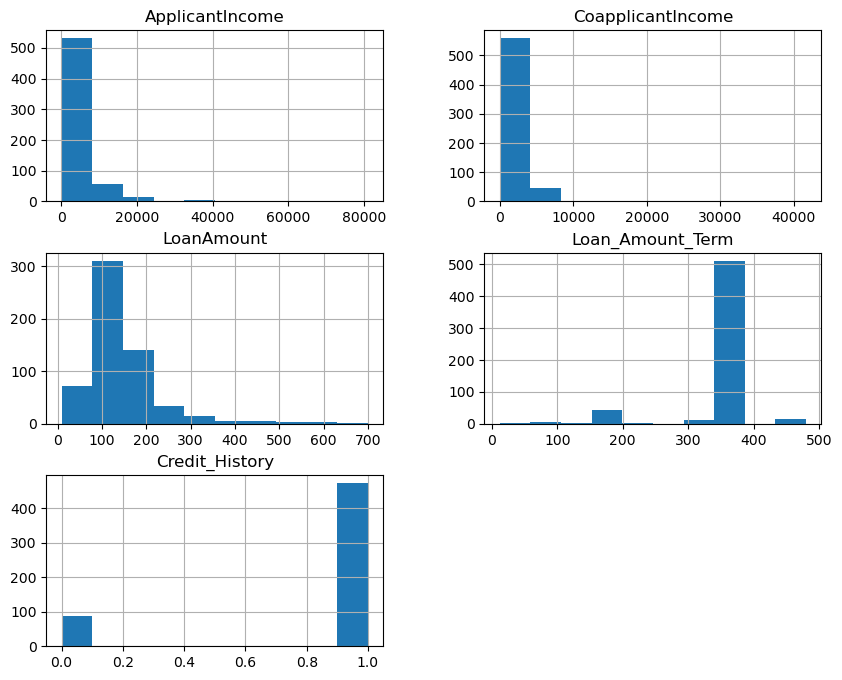

In [28]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8))
plt.show()


In [29]:
# Print rows where the 'Married' column has missing values
missing_married_rows = df[df['Gender'].isnull()]
print(missing_married_rows)


      Loan_ID Gender Married Dependents     Education Self_Employed  \
23   LP001050    NaN     Yes          2  Not Graduate            No   
126  LP001448    NaN     Yes         3+      Graduate            No   
171  LP001585    NaN     Yes         3+      Graduate            No   
188  LP001644    NaN     Yes          0      Graduate           Yes   
314  LP002024    NaN     Yes          0      Graduate            No   
334  LP002103    NaN     Yes          1      Graduate           Yes   
460  LP002478    NaN     Yes          0      Graduate           Yes   
467  LP002501    NaN     Yes          0      Graduate            No   
477  LP002530    NaN     Yes          2      Graduate            No   
507  LP002625    NaN      No          0      Graduate            No   
576  LP002872    NaN     Yes          0      Graduate            No   
588  LP002925    NaN      No          0      Graduate            No   
592  LP002933    NaN      No         3+      Graduate           Yes   

     

In [30]:
# Print rows where the 'Dependents' column has missing values
missing_married_rows = df[df['Dependents'].isnull()]
print(missing_married_rows)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
102  LP001350    Male     Yes        NaN      Graduate            No   
120  LP001426    Male     Yes        NaN      Graduate            No   
226  LP001754    Male     Yes        NaN  Not Graduate           Yes   
293  LP001945  Female      No        NaN      Graduate            No   
301  LP001972    Male     Yes        NaN  Not Graduate            No   
332  LP002100    Male      No        NaN      Graduate            No   
335  LP002106    Male     Yes        NaN      Graduate           Yes   
346  LP002130    Male     Yes        NaN  Not Graduate            No   
355  LP002144  Female      No        NaN      Graduate            No   
517  LP002682    Male     Yes        NaN  Not Graduate            No   
571  LP002847    Male     Yes        NaN      Graduate            No   
597  LP002943    Male      No        NaN      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [31]:
#filling the missing values with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [40]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [41]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,127.5,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [43]:
#encoding the catagorical variables to numerical values,using label and ordinal encoding techniques

Label_enc=LabelEncoder()
df['Gender'] = Label_enc.fit_transform(df['Gender'])
df['Married'] = Label_enc.fit_transform(df['Married'])
df['Education'] = Label_enc.fit_transform(df['Education'])
df['Self_Employed'] = Label_enc.fit_transform(df['Self_Employed'])
df['Property_Area'] = Label_enc.fit_transform(df['Property_Area'])
df['Loan_Status'] = Label_enc.fit_transform(df['Loan_Status'])

In [44]:
dependent_no = ['0', '1', '2', '3+']
ordinal_enc= OrdinalEncoder(categories=[dependent_no])
df['Dependents'] = ordinal_enc.fit_transform(df[['Dependents']])


In [45]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,127.5,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             611 non-null    int64  
 2   Married            611 non-null    int64  
 3   Dependents         611 non-null    float64
 4   Education          611 non-null    int64  
 5   Self_Employed      611 non-null    int64  
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         611 non-null    float64
 9   Loan_Amount_Term   611 non-null    float64
 10  Credit_History     611 non-null    float64
 11  Property_Area      611 non-null    int64  
 12  Loan_Status        611 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 66.8+ KB


In [47]:
#Applying scaling on features 
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
min_max = MinMaxScaler()
df[features] = min_max.fit_transform(df[features])


In [48]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,0.070489,0.000000,0.171491,0.743590,1.0,2,1
1,LP001003,1,1,1.0,0,0,0.054830,0.036192,0.172214,0.743590,1.0,0,0
2,LP001005,1,1,0.0,0,1,0.035250,0.000000,0.082489,0.743590,1.0,2,1
3,LP001006,1,1,0.0,1,0,0.030093,0.056592,0.160637,0.743590,1.0,2,1
4,LP001008,1,0,0.0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,0,0.034014,0.000000,0.089725,0.743590,1.0,0,1
610,LP002979,1,1,3.0,0,0,0.048930,0.000000,0.044863,0.358974,1.0,0,1
611,LP002983,1,1,1.0,0,0,0.097984,0.005760,0.353111,0.743590,1.0,2,1
612,LP002984,1,1,2.0,0,0,0.091936,0.000000,0.257598,0.743590,1.0,2,1


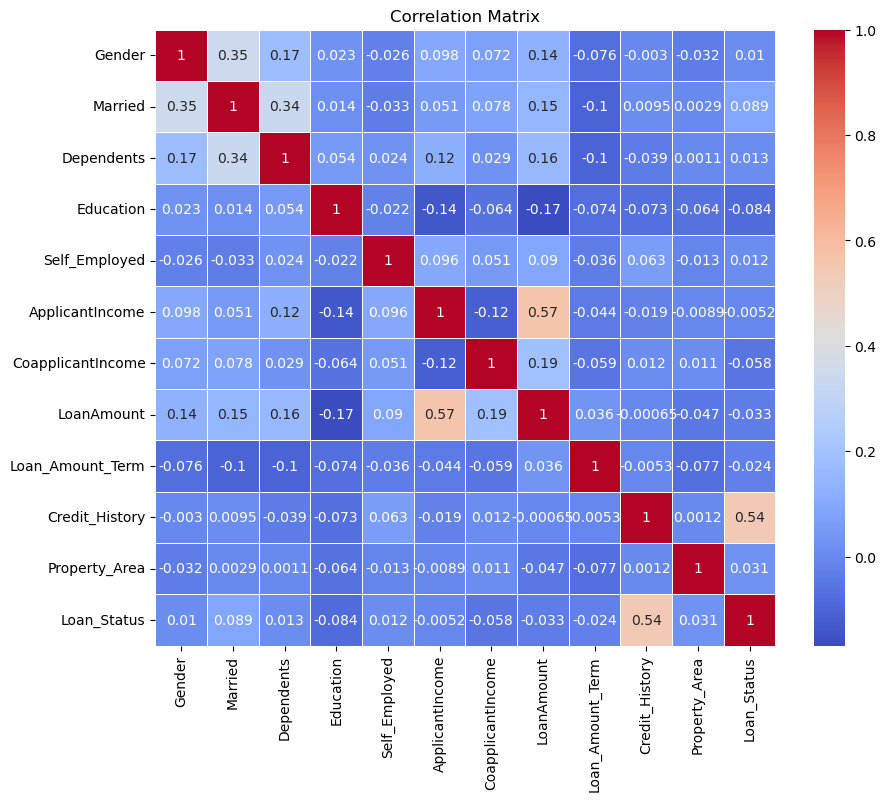

In [49]:
corr_matrix2 = df.corr() # Visualize the correlation matrix with annotations 
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix') 
plt.show()

In [50]:
df= df.drop("Loan_ID",axis=1)
X = df.drop('Loan_Status',axis= 1)
y = df['Loan_Status']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [53]:

y_pred = model.predict(X_test)


In [54]:
# # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8292682926829268


In [55]:
df_test = pd.read_csv('test_lAUu6dG.csv')
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [56]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
df_test.shape

(367, 12)

In [58]:
df_test.dropna(inplace=True)

In [59]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [60]:
df_test.shape

(289, 12)

In [61]:
df_test['Gender'] = Label_enc.fit_transform(df_test['Gender'])
df_test['Married'] = Label_enc.fit_transform(df_test['Married'])
df_test['Education'] = Label_enc.fit_transform(df_test['Education'])
df_test['Self_Employed'] = Label_enc.fit_transform(df_test['Self_Employed'])
df_test['Property_Area'] = Label_enc.fit_transform(df_test['Property_Area'])


In [62]:
dependent_no = ['0', '1', '2', '3+']
ordinal_enc= OrdinalEncoder(categories=[dependent_no])
df_test['Dependents'] = ordinal_enc.fit_transform(df_test[['Dependents']])


In [63]:
df_test[features] = min_max.fit_transform(df_test[features])

In [64]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,0,0,0.078865,0.000000,0.189815,0.746835,1.0,2
1,LP001022,1,1,1.0,0,0,0.042411,0.062500,0.226852,0.746835,1.0,2
2,LP001031,1,1,2.0,0,0,0.068938,0.075000,0.416667,0.746835,1.0,2
4,LP001051,1,0,0.0,1,0,0.045168,0.000000,0.115741,0.746835,1.0,2
5,LP001054,1,1,0.0,1,1,0.029850,0.142583,0.287037,0.746835,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1.0,0,0,0.031284,0.090292,0.164352,0.746835,1.0,1
362,LP002971,1,1,3.0,1,1,0.055274,0.074042,0.196759,0.746835,1.0,2
363,LP002975,1,1,0.0,0,0,0.057329,0.029542,0.201389,0.746835,1.0,2
365,LP002986,1,1,0.0,0,0,0.068938,0.099708,0.300926,0.746835,1.0,0


In [65]:
df_test_1=df_test.drop('Loan_ID',axis=1)

In [66]:


# Make predictions
y_new_pred = model.predict(df_test_1)

print(y_new_pred)


[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [68]:


# Map 1 to 'Y' and 0 to 'N'
y_new_pred_mapped = ['Y' if pred == 1 else 'N' for pred in y_new_pred]

# Save predictions for submission
submission_df = pd.DataFrame({'Loan_ID': df_test['Loan_ID'], 'prediction': y_new_pred_mapped})
submission_df.to_csv('submission.csv', index=False)
